In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

In [2]:
## Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0


In [3]:
## Build model (Functional API)
## MLP model with explicit initializer (just for clarity)
inputs = Input(shape=(784,))
x = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=outputs)

In [4]:
## Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
## Train
history = model.fit(x_train, y_train, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6913 - loss: 0.8704 - val_accuracy: 0.8503 - val_loss: 0.4122
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8382 - loss: 0.4528 - val_accuracy: 0.8623 - val_loss: 0.3785
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8560 - loss: 0.4012 - val_accuracy: 0.8592 - val_loss: 0.3709
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8610 - loss: 0.3829 - val_accuracy: 0.8725 - val_loss: 0.3508
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8675 - loss: 0.3589 - val_accuracy: 0.8748 - val_loss: 0.3412
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8775 - loss: 0.3402 - val_accuracy: 0.8763 - val_loss: 0.3320
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8768 - loss: 0.3366 - val_accuracy: 0.8757 - val_loss: 0.3346
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8797 - loss: 0.3268 - val_accuracy: 0.

In [7]:
## Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.3238
Test accuracy: 0.8870999813079834


In [8]:
# Save model
model.save("fashion_mnist_mlp.h5")

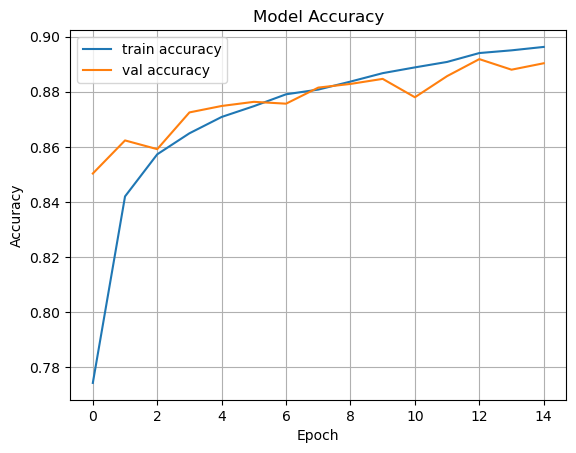

In [9]:
## Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

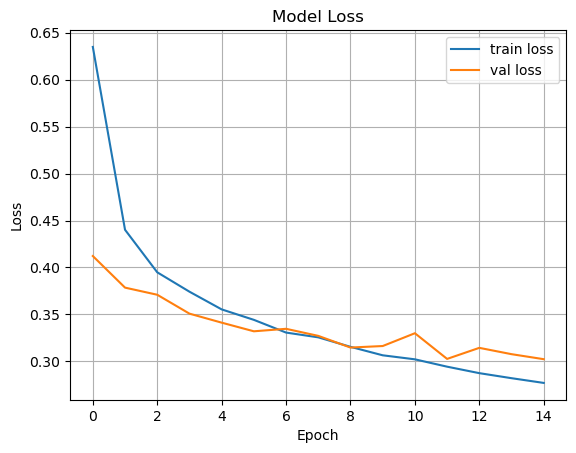

In [10]:
## Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


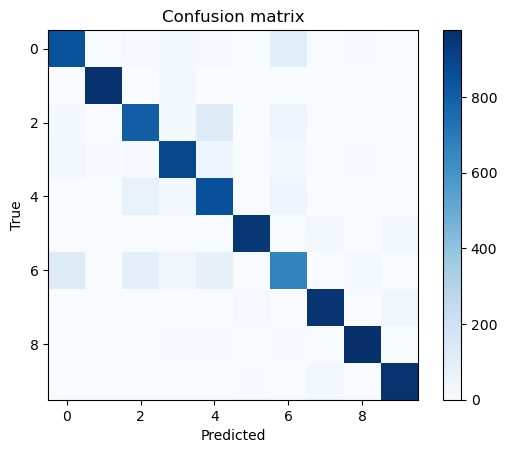

In [11]:
## Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()